In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Instantiate Model

In [21]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

### Encode and Calculate Sentiment

In [22]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [23]:
result = model(tokens)

In [24]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [25]:
int(torch.argmax(result.logits))+1

4

### Scraping Reviews

In [26]:
r = requests.get('https://www.yelp.com/biz/social-brew-cafe-pyrmont')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [27]:
reviews

['Some of the best Milkshakes me and my daughter ever tasted. MMMMMM HMMMMMMMM.',
 'Great place with delicious food and friendly staff. It is small but has outdoor seating and a relaxed ambiance. Perfect place to enjoy a cup of coffee. I am visiting Sydney for the first time but this place seems like is a local favorite.',
 'Great food amazing coffee and tea. Short walk from the harbor. Staff was very friendly',
 "It was ok. Had coffee with my friends. I'm new in the area, still need to discover new places.",
 "Ricotta hot cakes! These were so yummy. I ate them pretty fast and didn't share with anyone because they were that good ;). I ordered a green smoothie to balance it all out. Smoothie was a nice way to end my brekkie at this restaurant. Others with me ordered the salmon Benedict and the smoked salmon flatbread. They were all delicious and all plates were empty. Cheers!",
 'Great staff and food. \xa0Must try is the pan fried Gnocchi! \xa0The staff were really friendly and the coff

### Evaluating model

In [28]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

In [29]:
df['review'].iloc[0]

'Some of the best Milkshakes me and my daughter ever tasted. MMMMMM HMMMMMMMM.'

In [30]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [31]:
sentiment_score(df['review'].iloc[1])


5

In [32]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [33]:
df

,review,sentiment
0,Some of the best Milkshakes me and my daughter...,5
1,Great place with delicious food and friendly s...,5
2,Great food amazing coffee and tea. Short walk ...,5
3,It was ok. Had coffee with my friends. I'm new...,3
4,Ricotta hot cakes! These were so yummy. I ate ...,5
5,Great staff and food. Must try is the pan fri...,5
6,We came for brunch twice in our week-long visi...,4
7,I came to Social brew cafe for brunch while ex...,5
8,It was ok. The coffee wasn't the best but it w...,3
9,Great coffee and vibe. That's all you need. C...,5


In [34]:
df['review'].iloc[10]

"Great coffee and vibe. That's all \xa0you need. Crab was outstanding but not good finger food like a taco should be. Really want to try the pork belly sandwich - looked excellent."

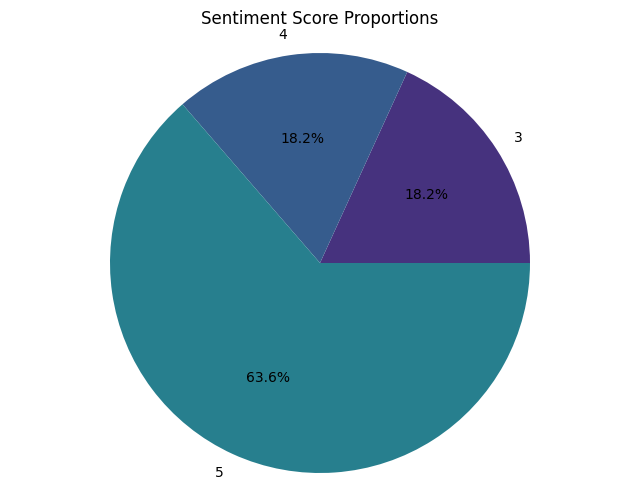

In [35]:
# Calculate the count of each sentiment score
sentiment_counts = df['sentiment'].value_counts()

# Sort the data by index (sentiment score) to maintain order
sentiment_counts = sentiment_counts.sort_index()
# Calculate the proportion of each sentiment score
sentiment_proportions = sentiment_counts / sentiment_counts.sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_proportions, labels=sentiment_proportions.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Sentiment Score Proportions')
plt.axis('equal')
plt.show()

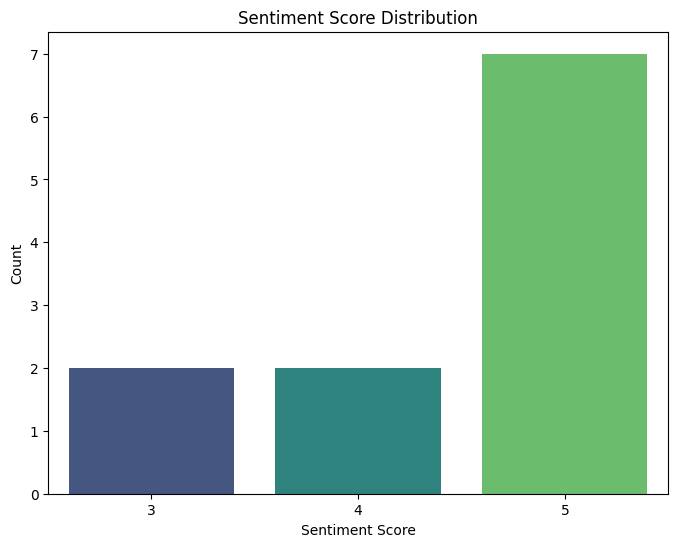

In [36]:
# Calculate the count of each sentiment score
sentiment_counts = df['sentiment'].value_counts()

# Sort the data by index (sentiment score) to maintain order
sentiment_counts = sentiment_counts.sort_index()

#bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Score Distribution')
plt.show()


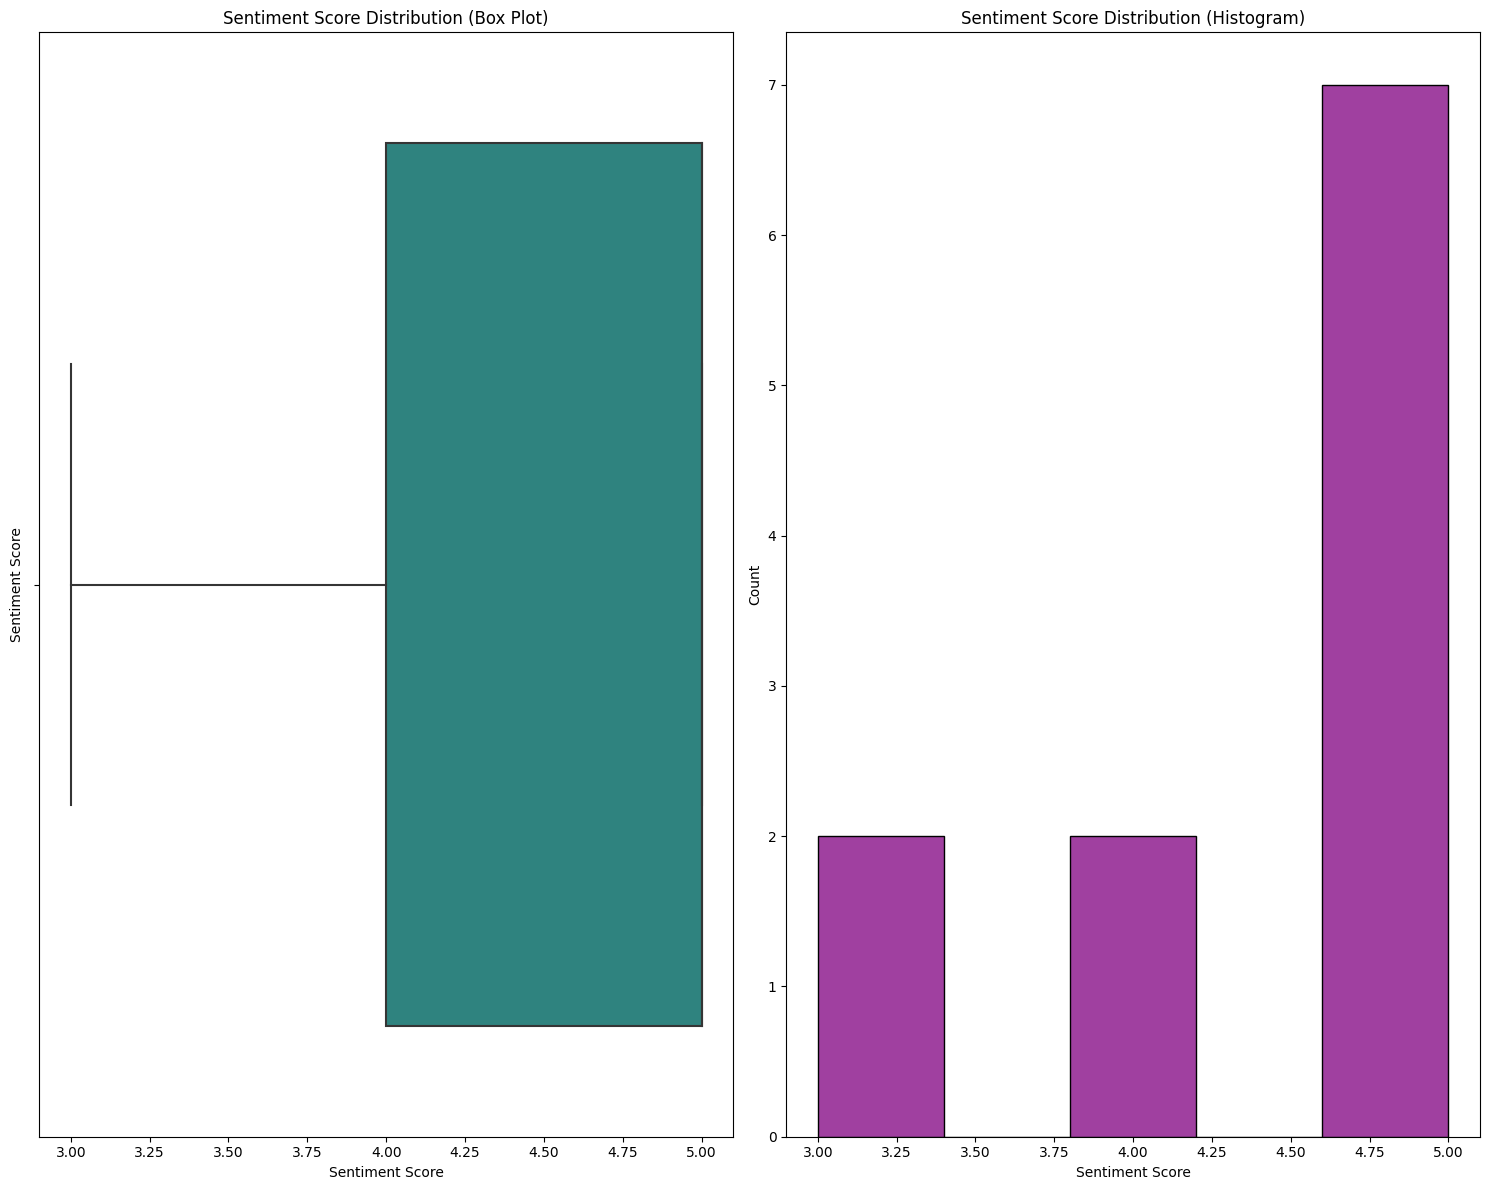

In [45]:

# Calculate the count of each sentiment score
sentiment_counts = df['sentiment'].value_counts()

# Sort the data by index (sentiment score) to maintain order
sentiment_counts = sentiment_counts.sort_index()

# Calculate the proportion of each sentiment score
sentiment_proportions = sentiment_counts / sentiment_counts.sum()

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 12))

# Box plot
sns.boxplot(x='sentiment', data=df, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Sentiment Score')
axes[0].set_title('Sentiment Score Distribution (Box Plot)')

# Histogram
sns.histplot(df['sentiment'], bins=5, kde=False, color='purple', ax=axes[1])
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Count')
axes[1].set_title('Sentiment Score Distribution (Histogram)')

plt.tight_layout()

plt.show()
